## Data Access

Here's a notebook to help you out getting started with the data. Please let me know ASAP if you run into any issues. Excited to see how your analyses turn out!

In [1]:
from google.cloud import bigquery
import polars as pl
import pandas as pd
import plotnine as p9
from pprint import pprint

In [2]:
# Create a client object
client = bigquery.Client()

# Define the query
qry_location_count = """
    SELECT
    location,
    COUNT(*) AS num_listings
    FROM
    `umt-msba.carbitrage.processed_listing_pages_20240913`
    GROUP BY
    location
    ORDER BY
    num_listings desc
"""

# Run the query
query_job = client.query(qry_location_count)

# Get the results
results = query_job.result()


In [3]:
location_counts = pl.DataFrame(results.to_dataframe())


In [4]:
# This will get our plot to show up in the correct order

location_counts = (
    location_counts
    .sort('num_listings')  # Sort by num_listings
    .with_columns([
        pl.col('location').cast(pl.Categorical).alias('location')  # Cast to Categorical type
    ])
)

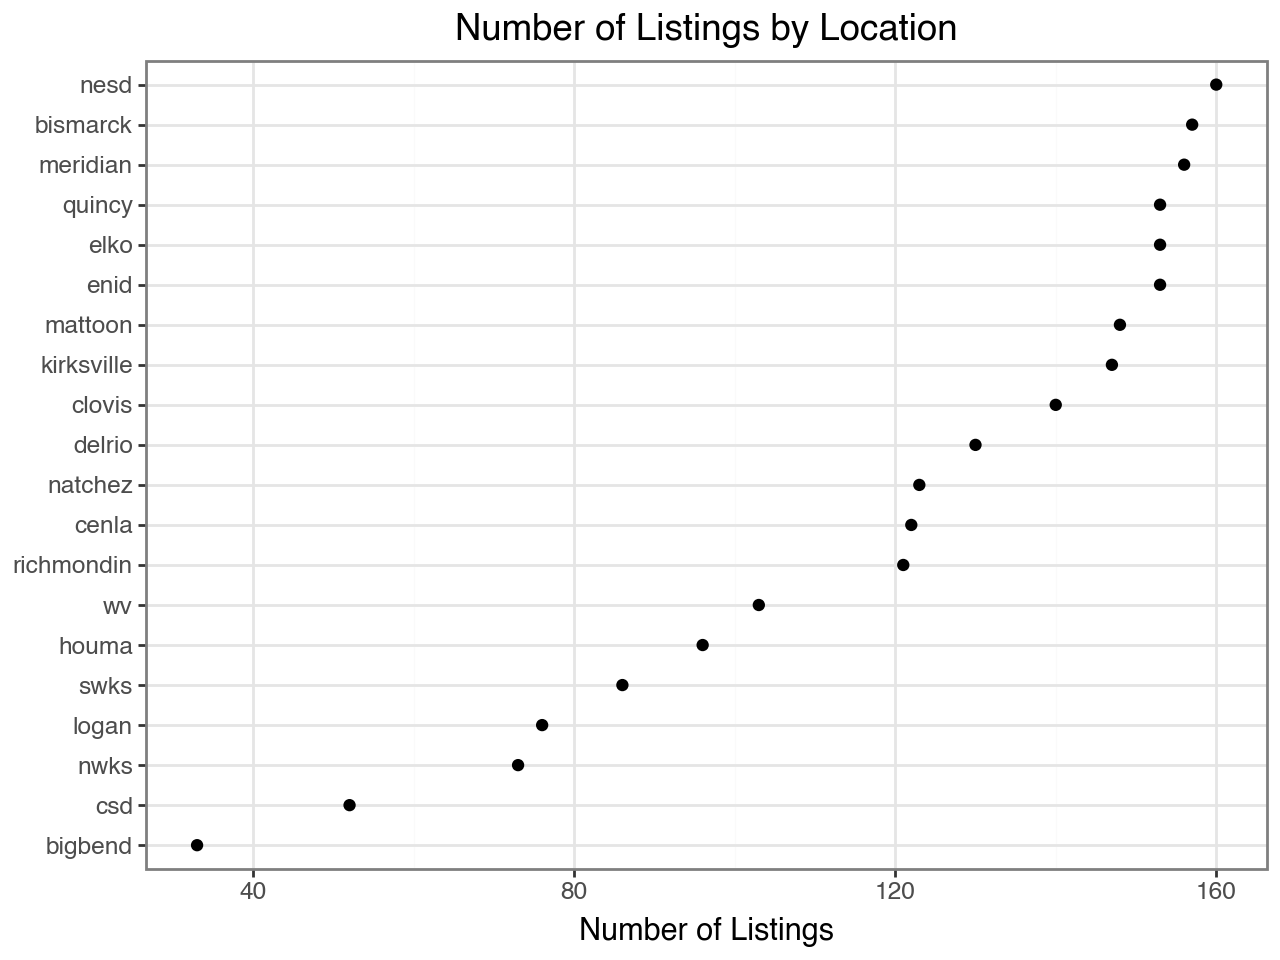

In [5]:
plot = (
  p9.ggplot(location_counts.head(n=20), p9.aes(x='num_listings', y='location')) +
  p9.geom_point() +
  p9.theme_bw() + 
  p9.labs(title='Number of Listings by Location', x='Number of Listings', y='')
)

plot
